In [20]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [22]:
df1.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
df1 = df1.rename(columns={'movie_id': 'id'})
df1=df1.drop(['title'],axis=1)
# Merge the two dataframes based on the common 'id' column
df2 = df2.merge(df1, on='id')

In [24]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [25]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


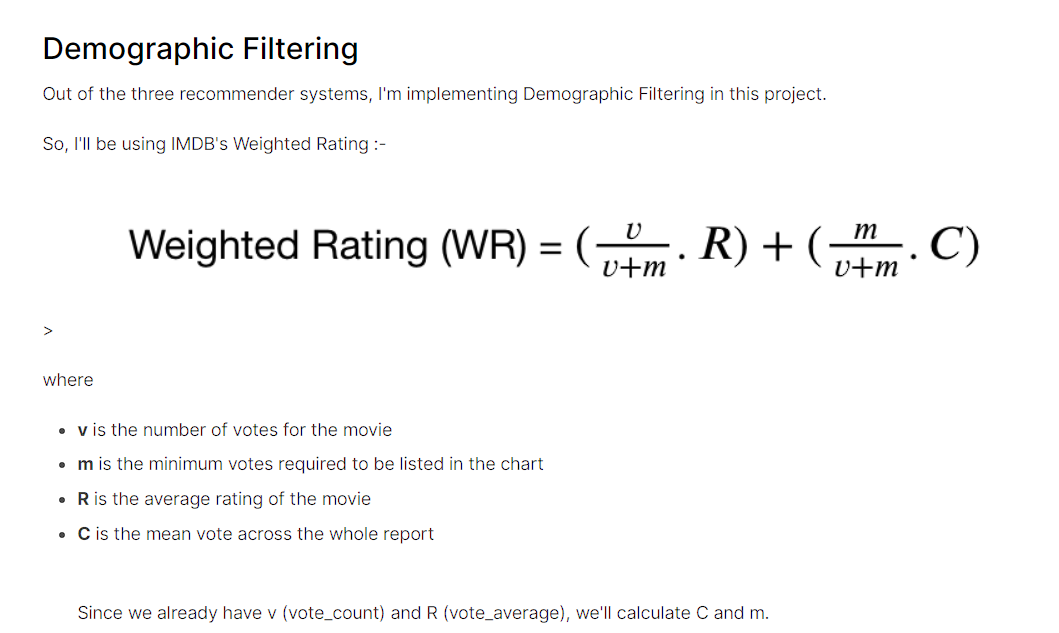

In [26]:
C = df2['vote_average'].mean()
C

6.092171559442016

In [27]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [28]:
s_movies = df2.copy().loc[df2['vote_count'] >= m]
s_movies.shape
s_movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [29]:
def weighted_rating(x, m=m , C=C):
    v = x['vote_count']
    R = x['vote_average']

    # Calculation based on IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [30]:
s_movies['calc_score'] = s_movies.apply(weighted_rating, axis=1)

In [31]:
# Now, sort movies based on calculated score above

s_movies = s_movies.sort_values('calc_score',ascending=False)

s_movies[['title','vote_count','vote_average','calc_score']]

,title,vote_count,vote_average,calc_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
...,...,...,...,...
41,Green Lantern,2487,5.1,5.521697
337,A Good Day to Die Hard,3493,5.2,5.507643
193,After Earth,2532,5.0,5.459420
91,Independence Day: Resurgence,2491,4.9,5.406234


In [32]:
# The TOP 10 movies

s_movies[['title','vote_count','vote_average','calc_score']].head(20)

,title,vote_count,vote_average,calc_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


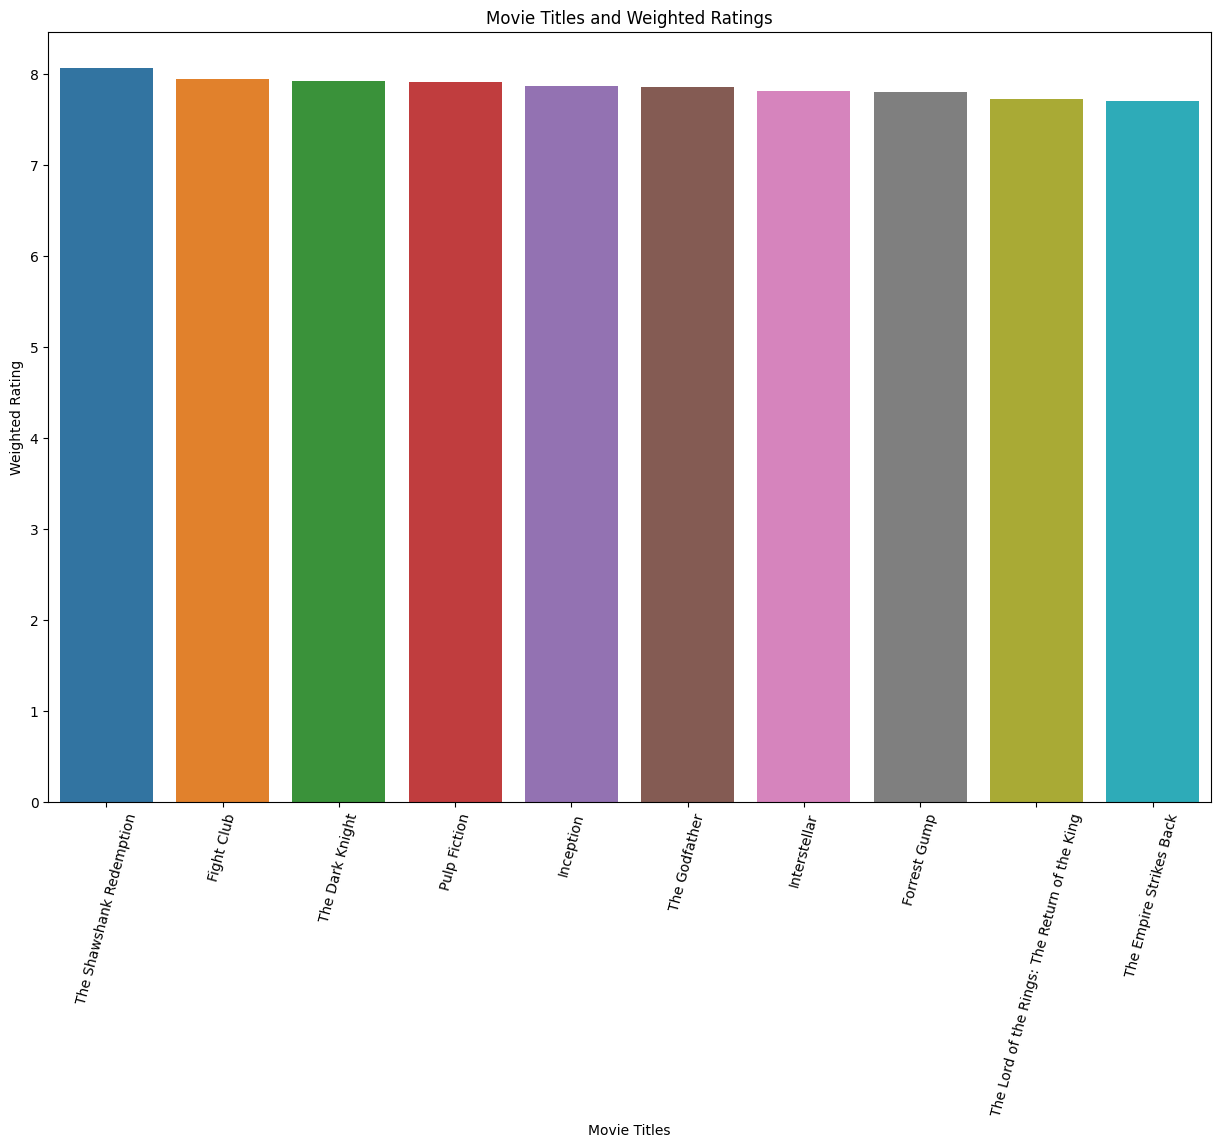

In [33]:
# Set the size of the figure
import seaborn as sns
plt.figure(figsize=(15, 10))

# Create a bar plot using Seaborn
sns.barplot(x='title', y='calc_score', data=s_movies[['title','vote_count','vote_average','calc_score']].head(10))

# Set the labels for the axes
plt.xlabel('Movie Titles')
plt.ylabel('Weighted Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Set the title of the plot
plt.title('Movie Titles and Weighted Ratings')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Most Popular Movies')

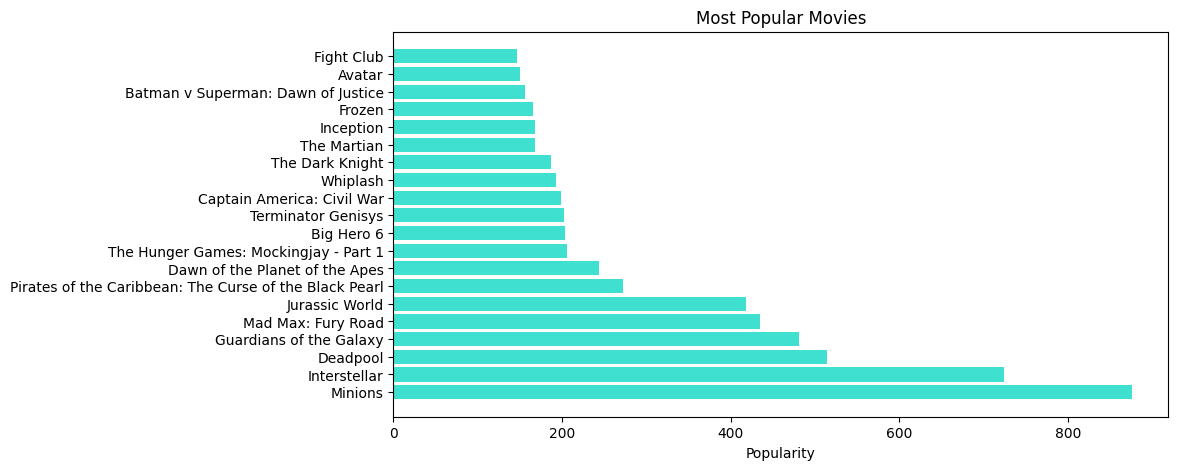

In [34]:
pop= df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(10,5))

plt.barh(pop['title'].head(20),pop['popularity'].head(20)   ,    color='turquoise')
plt.xlabel("Popularity")
plt.title("Most Popular Movies")

In [35]:
# drop null overviews
df2.dropna(subset = ['overview'], inplace=True)

# filter out target columns
df2 = df2[['id', 'title', 'genres', 'overview', 'cast', 'crew']]

# check new df info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4800 non-null   int64 
 1   title     4800 non-null   object
 2   genres    4800 non-null   object
 3   overview  4800 non-null   object
 4   cast      4800 non-null   object
 5   crew      4800 non-null   object
dtypes: int64(1), object(5)
memory usage: 262.5+ KB


In [36]:
# function to generate corpus
def generate_corpus(overview, genre, cast, crew):

    corpus = ""

    genre = ' '.join([i['name'] for i in eval(genre)])

    cast = ' '.join([i['name'] for i in eval(cast)[:3]])

    crew = ' '.join(list(set([i['name'] for i in eval(crew) if i['job']=='Director' or i['job']=='Producer'])))

    corpus+= overview + " " + genre + " " + cast + " " + crew

    return corpus


corpus = []
for i in range(len(df2)):
    corpus.append(generate_corpus(df2.iloc[i].overview, df2.iloc[i].genres, df2.iloc[i].cast, df2.iloc[i].crew))


len(corpus)

# check the corpus
corpus[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy Science Fiction Sam Worthington Zoe Saldana Sigourney Weaver Jon Landau James Cameron'

In [37]:
# rename the column
df2.rename(columns = {'title_x':'title'}, inplace = True)

# drop old columns
df2.drop(columns=['genres', 'overview', 'cast', 'crew'], inplace=True)

# add corpus
df2['corpus'] = corpus

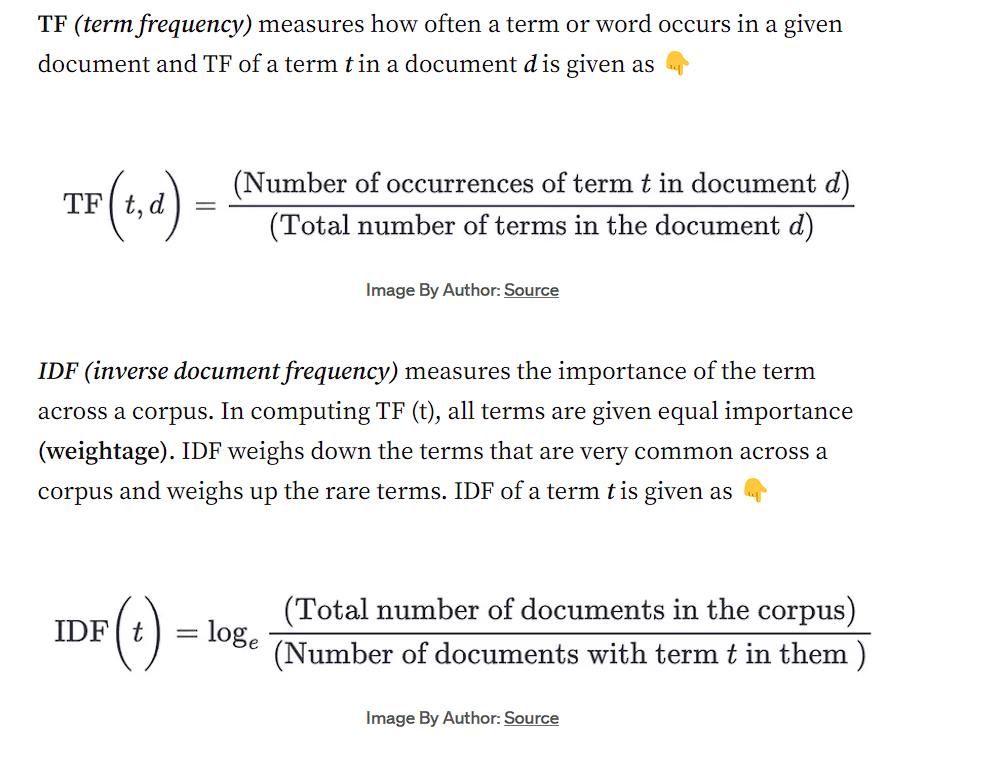

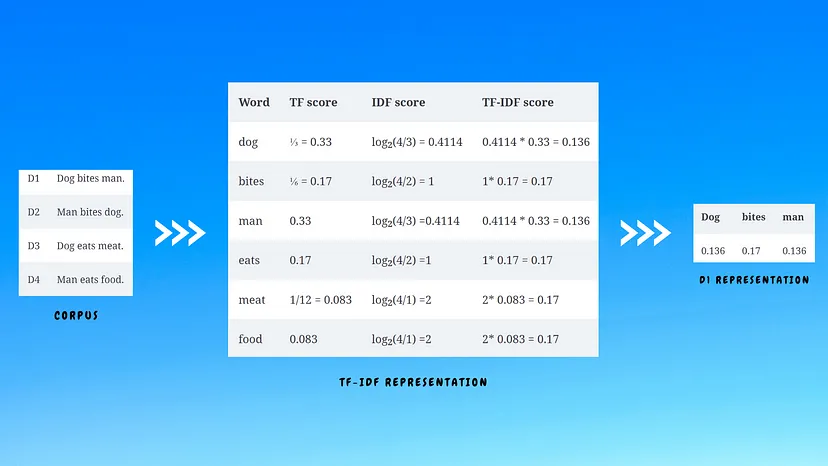

Cosine Similarity

In [38]:
# import deps
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the Object and remove stopwords
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df2['corpus'])

# compare shapes
df2.shape

(4800, 3)

In [39]:
tfidf_matrix.shape

(4800, 29102)

In [40]:
from sklearn.metrics.pairwise import linear_kernel

# compute the similarity matirx
cos_mat = linear_kernel(tfidf_matrix, tfidf_matrix)

cos_mat.shape

(4800, 4800)

In [41]:
diag = 0
for i in range(len(cos_mat)):
    diag+= cos_mat[i][i]

print(diag)

4800.0


In [42]:
df2.head(3)

,id,title,corpus
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...


Now try the recommender

In [43]:
def get_recommendations(movie, n):

    # get index from dataframe
    index = df2[df2['title']== movie].index[0]
    print(index)

    # sort top n similar movies
    similar_movies = sorted(list(enumerate(cos_mat[index])), reverse=True, key=lambda x: x[1])

    # extract names from dataframe and return movie names
    recomm = []
    for i in similar_movies[1:n+1]:
        recomm.append(df2.iloc[i[0]].title)

    return recomm


# lets test the function
get_recommendations("The Dark Knight", 5)


65


['The Dark Knight Rises',
 'Batman Begins',
 'Batman Returns',
 'Batman Forever',
 'Batman: The Dark Knight Returns, Part 2']

In [44]:

get_recommendations("Mission: Impossible", 10)

425


['Mission: Impossible III',
 'Mission: Impossible II',
 'Vanilla Sky',
 'Mission: Impossible - Ghost Protocol',
 'Mission: Impossible - Rogue Nation',
 'The Last Samurai',
 '8 Women',
 'Jack Reacher',
 'The Sentinel',
 'Eyes Wide Shut']

In [45]:
import joblib

joblib.dump(df2, 'movie_db.df')
joblib.dump(cos_mat, 'cos_mat.mt')
joblib.dump(tfidf, 'vectorizer.tf')
joblib.dump(tfidf_matrix, 'tfidf_mat.tf')

['tfidf_mat.tf']

In [46]:
#Thank You 
#By Kumar Harsh